In [2]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.concat([pd.read_csv('D:/AIN GenX - Data Analyst/5-Day/archive/2015.csv'), pd.read_csv('D:/AIN GenX - Data Analyst/5-Day/archive/2016.csv'), pd.read_csv('D:/AIN GenX - Data Analyst/5-Day/archive/2017.csv'), pd.read_csv('D:/AIN GenX - Data Analyst/5-Day/archive/2018.csv'), pd.read_csv('D:/AIN GenX - Data Analyst/5-Day/archive/2019.csv')], axis=0)
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 155
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    float64
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Lower Confidence Interval      157 non-null    float64


In [3]:
df.isnull().count()

Country                          782
Region                           782
Happiness Rank                   782
Happiness Score                  782
Standard Error                   782
Economy (GDP per Capita)         782
Family                           782
Health (Life Expectancy)         782
Freedom                          782
Trust (Government Corruption)    782
Generosity                       782
Dystopia Residual                782
Lower Confidence Interval        782
Upper Confidence Interval        782
Happiness.Rank                   782
Happiness.Score                  782
Whisker.high                     782
Whisker.low                      782
Economy..GDP.per.Capita.         782
Health..Life.Expectancy.         782
Trust..Government.Corruption.    782
Dystopia.Residual                782
Overall rank                     782
Country or region                782
Score                            782
GDP per capita                   782
Social support                   782
H

K-Nearest Neighbors (KNN) imputation is a popular method for handling missing data. It works by finding the K nearest neighbors of a missing value in the feature space and using their values to impute the missing value.

In [4]:
import pandas as pd
from sklearn.impute import KNNImputer

# Select only numerical columns for imputation
numerical_df = df.select_dtypes(include=['number'])

# Apply KNNImputer on the numerical columns
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_imputed_numerical = imputer.fit_transform(numerical_df)

# Convert the imputed array back to a DataFrame
df_imputed_numerical = pd.DataFrame(df_imputed_numerical, columns=numerical_df.columns)

# If you still need to work with the original DataFrame, you can merge the imputed numerical columns back
df_imputed = df.copy()
df_imputed[numerical_df.columns] = df_imputed_numerical

# Drop rows with missing values in non-numerical columns if needed
df_imputed = df_imputed.dropna(subset=['Country', 'Region', 'Country or region'])

# Merge the imputed numerical DataFrame with the original non-numerical columns
df_final = pd.merge(df_imputed_numerical, df[['Country', 'Region', 'Country or region']], left_index=True, right_index=True, how='inner')

# Check for remaining missing values
print(df_final.isnull().sum())

# Display the first 10 rows of the final DataFrame
df_final.head(10)


Happiness Rank                     0
Happiness Score                    0
Standard Error                     0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
Happiness.Rank                     0
Happiness.Score                    0
Whisker.high                       0
Whisker.low                        0
Economy..GDP.per.Capita.           0
Health..Life.Expectancy.           0
Trust..Government.Corruption.      0
Dystopia.Residual                  0
Overall rank                       0
Score                              0
GDP per capita                     0
Social support                     0
Healthy life expectancy            0
Freedom to make life choices       0
Perceptions of corruption          0
C

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Country,Region,Country or region
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,Switzerland,Western Europe,NaN
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,Denmark,Western Europe,NaN
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,Norway,NaN,NaN
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,NaN,NaN,Finland
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,NaN,NaN,Finland
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,Iceland,Western Europe,NaN
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,Switzerland,Western Europe,NaN
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,Denmark,NaN,NaN
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,NaN,NaN,Norway
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,NaN,NaN,Denmark


In [5]:
from pyspan import handle_nulls
#If Country or region is missing, we can fill it with the value from Country.
#If Region is missing, we can fill it based on the country.


# First, let's fill missing values in 'Country or region' using 'Country'
df_final['Country or region'].fillna(df_final['Country'], inplace=True)

# Now, fill missing values in 'Country' using 'Country or region'
df_final['Country'].fillna(df_final['Country or region'], inplace=True)

# Finally, fill missing values in 'Region' with a placeholder like 'Unknown'
df_final = handle_nulls(df_final, columns='Region', action='replace', with_val='Unknown', inplace=False)

print(df_final[['Country', 'Region', 'Country or region']].isnull().sum())
df_final.head(10)

Country              0
Region               0
Country or region    0
dtype: int64


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Country,Region,Country or region
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,Switzerland,Western Europe,Switzerland
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,Denmark,Western Europe,Denmark
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,Norway,Unknown,Norway
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,Finland,Unknown,Finland
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,67.4,5.7038,0.9582,1.4008,0.7504,0.5364,0.1188,Finland,Unknown,Finland
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,Iceland,Western Europe,Iceland
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,Switzerland,Western Europe,Switzerland
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,Denmark,Unknown,Denmark
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,Norway,Unknown,Norway
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,112.6,4.4722,0.6992,0.9048,0.5366,0.2644,0.1036,Denmark,Unknown,Denmark


In [6]:
#Now for Outliers
import pyspan as pp
df2 = pp.detect_outliers(df_final, method='iqr', threshold=1.5)

Total number of outliers detected: 302
Original data shape: (782, 30)
Data shape after removing outliers: (530, 30)


Now for EDA (Exploratory Data Analysis)

In [7]:
# Summary statistics for numerical columns
print(df2.columns)
df2.describe()

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption', 'Country',
       'Region', 'Country or region'],
      dtype='object')


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,83.433962,5.263877,0.045330,0.845720,0.999110,0.634864,0.403201,0.112163,0.198780,2.070059,...,0.438566,0.105905,1.812311,82.745283,5.276421,0.852162,1.183491,0.639953,0.413355,0.095296
std,39.694728,0.926746,0.011112,0.346228,0.222961,0.225380,0.145390,0.079840,0.108549,0.475746,...,0.135903,0.039427,0.175458,21.306433,0.524445,0.211662,0.161101,0.122713,0.070648,0.036944
min,12.000000,3.340000,0.018480,0.000000,0.353860,0.000000,0.000000,0.000000,0.000000,0.899910,...,0.200703,0.046959,1.340612,21.600000,4.185200,0.331600,0.741800,0.406000,0.231400,0.029200
25%,49.000000,4.565000,0.038230,0.593250,0.869080,0.515290,0.305870,0.057470,0.119730,1.753600,...,0.336374,0.076108,1.682640,70.000000,4.914400,0.713600,1.092200,0.544200,0.369400,0.067800
50%,83.000000,5.166000,0.044550,0.918560,1.011840,0.696705,0.411530,0.087930,0.184790,2.012865,...,0.435065,0.093894,1.820647,81.500000,5.296400,0.869600,1.191100,0.641200,0.425000,0.089300
75%,117.000000,5.960000,0.050690,1.122540,1.202150,0.788050,0.514690,0.154450,0.243250,2.324070,...,0.557436,0.128364,1.932807,98.000000,5.574000,1.031200,1.313000,0.721800,0.458400,0.116200
max,155.000000,7.226000,0.073310,1.554220,1.369480,0.991110,0.662460,0.325240,0.519120,3.260010,...,0.719428,0.240293,2.210555,126.600000,6.847800,1.255600,1.482600,0.897400,0.588200,0.213600


In [8]:
# Summary statistics for categorical columns
df2.describe(include=['object', 'category'])

,Country,Region,Country or region
count,530,530,530
unique,155,9,155
top,Romania,Unknown,Romania
freq,5,318,5


Univariate Analysis

Region
Western Europe                     6.297000
Latin America and Caribbean        6.015971
Eastern Asia                       5.774500
Central and Eastern Europe         5.384089
Unknown                            5.263877
Middle East and Northern Africa    5.211259
Southeastern Asia                  5.183286
Southern Asia                      4.800556
Sub-Saharan Africa                 4.261788
Name: Happiness Score, dtype: float64


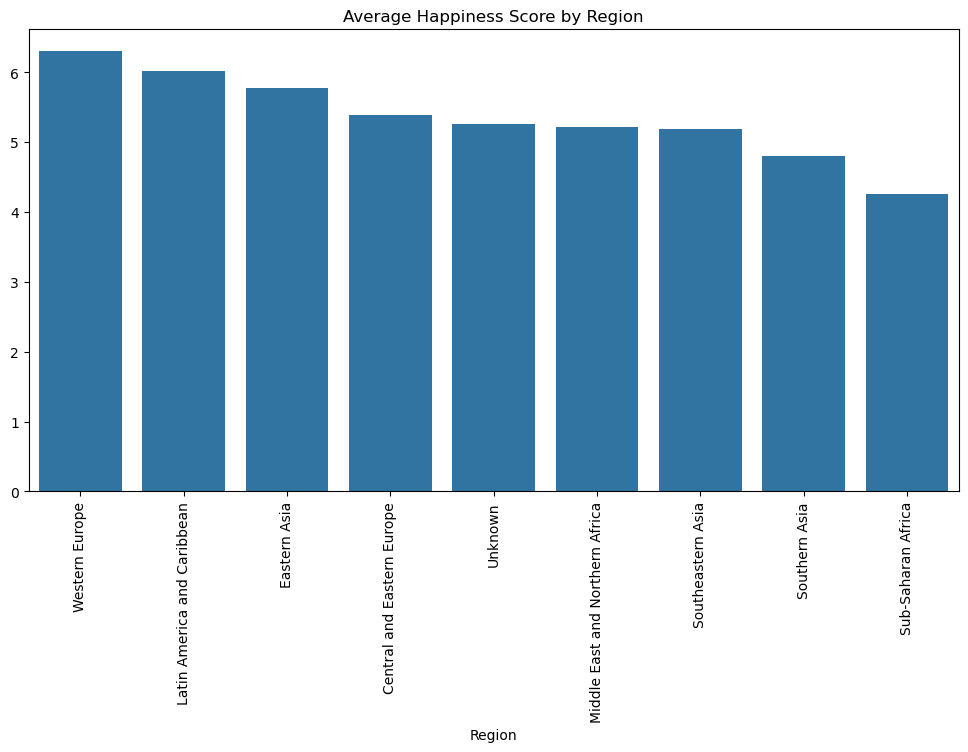

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Average Happiness Score by Region
region_avg = df2.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
print(region_avg)

# Bar plot for average Happiness Score by Region
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg.index, y=region_avg.values)
plt.title('Average Happiness Score by Region')
plt.xticks(rotation=90)
plt.show()

Bivariate Analysis

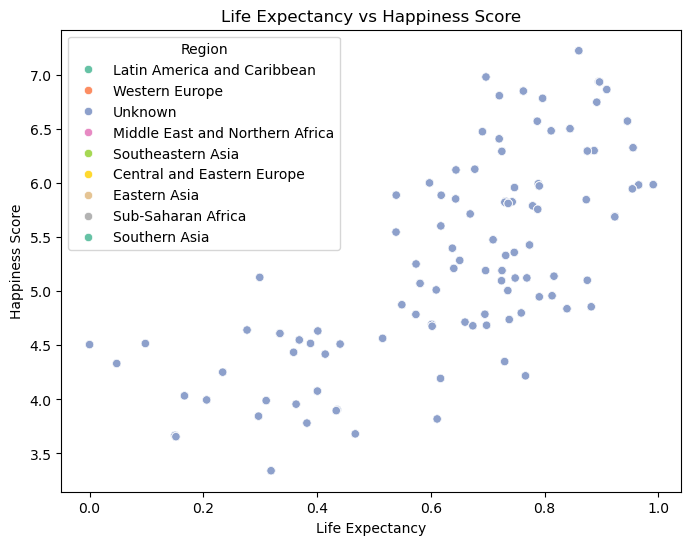

In [10]:
# Scatter plot between Life Expectancy and Happiness Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Health (Life Expectancy)', y='Happiness Score', data=df2, hue='Region', palette='Set2')
plt.title('Life Expectancy vs Happiness Score')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

Checking the Distribution of Happiness Scores

In [11]:
import plotly.express as px

# Plot the distribution of Happiness Scores
fig = px.histogram(df2, x="Happiness Score", marginal="box", 
                   title="Distribution of Happiness Scores",
                   labels={'Happiness Score':'Happiness Score'},
                   template="plotly_dark")

# Show the interactive plot
fig.show()